# Data Exploration and Validation

In this exercise we will cover how to use Ibis, Pandas, and Pandera to explore, tidy, and validate the data.

### Activity 1 - load data from SQL

#### 🔄 Task

- Use `ibis` to load the data from SQL into a pandas dataframe.

🚨 Only load the first 10,000 rows. This will speed our our ETL and testing.

#### ✅ Solution

In the first exercise we used SQLAlchemy to interact with SQL. Ibis is another Python package for interacting with SQL databases. Ibis is specially designed for analytics workloads.

```bash
python -m pip install 'ibis-framework[postgres]'
```

In [1]:
import os

import ibis

# Set up ibis for reading data
con = ibis.postgres.connect(
    user="posit",
    password=os.environ["CONF23_DB_PASSWORD"],
    host=os.environ["CONF23_DB_HOST"],
    port=5432,
    database="python_workshop"
)

Load the business license data.

In [2]:
business_license_raw = con.table(name="business_license_raw").limit(10_000).to_pandas()
business_license_raw

,id,license_id,account_number,site_number,legal_name,doing_business_as_name,address,city,state,zip_code,...,license_start_date,expiration_date,license_approved_for_issuance,date_issued,license_status,license_status_change_date,ssa,latitude,longitude,location
0,1091886-20050816,1609414,206261,1,"SUPERMERCADO SANTOS, INC.",Supermercado Santos,4045-4047 W 31ST ST,CHICAGO,IL,60623,...,2005-08-16T00:00:00.000,2006-08-15T00:00:00.000,2005-07-11T00:00:00.000,2005-07-12T00:00:00.000,AAI,None,None,41.836749961,-87.726132657,"\n, \n(41.83674996075794, -87.72613265682901)"
1,1091886-20060816,1729376,206261,1,"SUPERMERCADO SANTOS, INC.",Supermercado Santos,4045-4047 W 31ST ST,CHICAGO,IL,60623,...,2006-08-16T00:00:00.000,2007-08-15T00:00:00.000,2006-07-25T00:00:00.000,2006-07-26T00:00:00.000,AAI,None,None,41.836749961,-87.726132657,"\n, \n(41.83674996075794, -87.72613265682901)"
2,1091886-20070816,1833281,206261,1,"SUPERMERCADO SANTOS, INC.",Supermercado Santos,4045-4047 W 31ST ST,CHICAGO,IL,60623,...,2007-08-16T00:00:00.000,2008-08-15T00:00:00.000,2007-07-26T00:00:00.000,2007-07-27T00:00:00.000,AAI,None,None,41.836749961,-87.726132657,"\n, \n(41.83674996075794, -87.72613265682901)"
3,1091886-20080816,1912191,206261,1,"SUPERMERCADO SANTOS, INC.",Supermercado Santos,4045-4047 W 31ST ST,CHICAGO,IL,60623,...,2008-08-16T00:00:00.000,2010-08-15T00:00:00.000,2008-08-08T00:00:00.000,2008-08-11T00:00:00.000,AAI,None,None,41.836749961,-87.726132657,"\n, \n(41.83674996075794, -87.72613265682901)"
4,1091886-20100816,2039501,206261,1,"SUPERMERCADO SANTOS, INC.",Supermercado Santos,4045-4047 W 31ST ST,CHICAGO,IL,60623,...,2010-08-16T00:00:00.000,2012-08-15T00:00:00.000,2010-08-09T00:00:00.000,2010-08-10T00:00:00.000,AAI,None,None,41.836749961,-87.726132657,"\n, \n(41.83674996075794, -87.72613265682901)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1117-20020516,1229253,212,1,LAKE SHORE COMMISSARY,LAKE SHORE COMMISSARY,3950 N LAKE SHORE DR,CHICAGO,IL,60613,...,2002-05-16T00:00:00.000,2003-05-15T00:00:00.000,2002-05-10T00:00:00.000,2002-05-13T00:00:00.000,AAI,None,None,41.954344719,-87.645349621,"\n, \n(41.95434471865204, -87.6453496205995)"
9996,1117-20030516,1338484,212,1,LAKE SHORE COMMISSARY,LAKE SHORE COMMISSARY,3950 N LAKE SHORE DR,CHICAGO,IL,60613,...,2003-05-16T00:00:00.000,2004-05-15T00:00:00.000,2003-05-09T00:00:00.000,2003-05-12T00:00:00.000,AAI,None,None,41.954344719,-87.645349621,"\n, \n(41.95434471865204, -87.6453496205995)"
9997,1117-20040516,1404709,212,1,LAKE SHORE COMMISSARY,LAKE SHORE COMMISSARY,3950 N LAKE SHORE DR,CHICAGO,IL,60613,...,2004-05-16T00:00:00.000,2004-08-15T00:00:00.000,2004-04-22T00:00:00.000,2004-04-23T00:00:00.000,AAI,None,None,41.954344719,-87.645349621,"\n, \n(41.95434471865204, -87.6453496205995)"
9998,1117-20040816,1496367,212,1,LAKE SHORE COMMISSARY,LAKE SHORE COMMISSARY,3950 N LAKE SHORE DR,CHICAGO,IL,60613,...,2004-08-16T00:00:00.000,2005-08-15T00:00:00.000,2004-08-11T00:00:00.000,2004-08-12T00:00:00.000,AAI,None,None,41.954344719,-87.645349621,"\n, \n(41.95434471865204, -87.6453496205995)"


Load the food inspection data.

In [3]:
food_inspection_raw = con.table(name="food_inspection_raw").limit(10_000).to_pandas()
food_inspection_raw

,inspection_id,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location
0,277590,LILIW M3 ORIENTAL STORE INC.,LILIW M3 ORIENTAL STORE INC.,1927156,Restaurant,Risk 1 (High),4311 - 4315 N KEDZIE AVE,CHICAGO,IL,60618,2010-07-21T00:00:00.000,Canvass,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.95974034065365,-87.70805402090488,"(41.95974034065365, -87.70805402090488)"
1,277673,McCORMICK PLACE,WCI-125 PANTRY W-180,1932251,PANTRY,Risk 2 (Medium),2301 S INDIANA AVE,CHICAGO,IL,60616,2010-07-21T00:00:00.000,Canvass,Pass,None,41.85104667463312,-87.62209308455373,"(41.85104667463312, -87.62209308455373)"
2,343226,HALSTED STREET DELI,HALSTED STREET DELI,2008473,Restaurant,Risk 1 (High),1 S FRANKLIN ST,CHICAGO,IL,60606,2010-07-21T00:00:00.000,Canvass,Pass,31. CLEAN MULTI-USE UTENSILS AND SINGLE SERVIC...,41.88190275050587,-87.6351640597954,"(41.88190275050587, -87.6351640597954)"
3,277597,FILONEK'S,FILONEK'S,48472,Restaurant,Risk 2 (Medium),6213 N MILWAUKEE AVE,CHICAGO,IL,60646,2010-07-21T00:00:00.000,Canvass,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.99418952580172,-87.78468948624445,"(41.99418952580172, -87.78468948624445)"
4,277603,JIMMY JOHN'S GOURMET SANDWICH,JIMMY JOHN'S,57099,Restaurant,Risk 1 (High),3328 N CLARK ST,CHICAGO,IL,60657,2010-07-21T00:00:00.000,Canvass,Pass w/ Conditions,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.942396126778384,-87.65282389448343,"(41.942396126778384, -87.65282389448343)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,539214,BERGHOFF CAFE,BERGHOFF CAFE (T1 C26),64540,Restaurant,Risk 1 (High),11601 W TOUHY AVE,CHICAGO,IL,60666,2011-02-08T00:00:00.000,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,42.008536400868735,-87.91442843927047,"(42.008536400868735, -87.91442843927047)"
9996,491645,KWEI LIN CARRY-OUT,KWEI LIN CARRY-OUT,1844663,Restaurant,Risk 1 (High),2057 E 95TH ST,CHICAGO,IL,60617,2011-02-08T00:00:00.000,Canvass,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.72238443598619,-87.5733302660471,"(41.72238443598619, -87.5733302660471)"
9997,347281,THE UNITED CENTER,DON JULIO B-323,1974985,Liquor,Risk 3 (Low),1901 W MADISON ST,CHICAGO,IL,60612,2011-02-08T00:00:00.000,Canvass,Pass,None,41.881241456803345,-87.67428253395332,"(41.881241456803345, -87.67428253395332)"
9998,347282,THE UNITED CENTER,CAPTAIN MORGAN SPICED RUM B-312,1974985,Liquor,Risk 3 (Low),1901 W MADISON ST,CHICAGO,IL,60612,2011-02-08T00:00:00.000,Canvass,Pass,None,41.881241456803345,-87.67428253395332,"(41.881241456803345, -87.67428253395332)"


### Activity 2 - Explore the data

#### 🔄 Task

Begin exploring the data. You will want to understand.

- What columns exist in the data?
- How do the two data sets relate to one another?
- What is the type of each column (e.g. string, number, category, date)?
- Which columns could be useful for the model.
- What is the cardinality of categorical data?
- Is all of the data in scope?
- What steps will I need to perform to clean the data?

🚨 We are not performing feature engineering at this stage. But it is a good time to start thinking about what features you can create from the data.

#### ✅ Solution

In [4]:
import pandas as pd

##### Business license data

Distribution of business locations:

<Axes: xlabel='latitude', ylabel='longitude'>

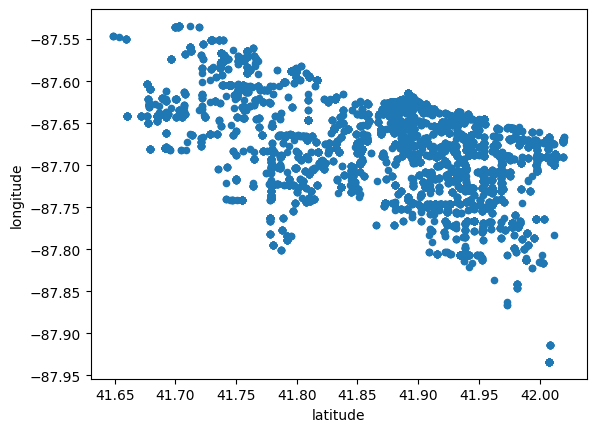

In [5]:
business_license_raw \
    .assign(
        latitude=lambda x: pd.to_numeric(x["latitude"]),
        longitude=lambda x: pd.to_numeric(x["longitude"]),
    ) \
    .plot(x="latitude", y="longitude", kind="scatter")

Most common license types:

In [6]:
business_license_raw \
    .assign(license_code_name=lambda x: x["license_code"] + " - " + x["license_description"]) \
    .loc[:, "license_code_name"] \
    .value_counts() \
    .sort_values(ascending=False) \
    .head(50)

1010 - Limited Business License                         4169
1006 - Retail Food Establishment                        1698
1008 - Hazardous Materials                               504
1781 - Tobacco                                           482
1475 - Consumption on Premises - Incidental Activity     411
1012 - Home Occupation                                   353
1011 - Home Repair                                       302
1009 - Manufacturing Establishments                      242
1474 - Package Goods                                     219
1569 - Motor Vehicle Repair : Engine Only (Class II)     208
1470 - Tavern                                            186
1007 - Wholesale Food Establishment                      152
1050 - Public Place of Amusement                         122
1570 - Motor Vehicle Repair: Engine/Body(Class III)       94
1525 - Massage Therapist                                  82
1061 - Electronic Equipment Repair                        67
1524 - Massage Establish

Do businesses have multiple licenses?

In [7]:
# Find the most common business
most_common_business = business_license_raw["legal_name"] \
    .value_counts() \
    .sort_values(ascending=False) \
    .head(1) \
    .reset_index() \
    .loc[0, "index"]

print(most_common_business)

business_license_raw \
    .loc[business_license_raw["legal_name"] == most_common_business] \
    .sort_values(by="license_id")

ILLINOIS BELL TELEPHONE COMPANY, LLC


,id,license_id,account_number,site_number,legal_name,doing_business_as_name,address,city,state,zip_code,...,license_start_date,expiration_date,license_approved_for_issuance,date_issued,license_status,license_status_change_date,ssa,latitude,longitude,location
3235,1093586-20030805,1093586,207268,3,"ILLINOIS BELL TELEPHONE COMPANY, LLC",AT&T ILLINOIS,1512 W CARMEN AVE 1,CHICAGO,IL,60640,...,2003-08-05T00:00:00.000,2003-11-15T00:00:00.000,2003-08-04T00:00:00.000,2003-08-05T00:00:00.000,AAI,None,22,41.974459086,-87.668806836,"\n, \n(41.974459085528615, -87.66880683641001)"
3243,1093592-20030819,1093592,207268,4,"ILLINOIS BELL TELEPHONE COMPANY, LLC",AT&T Illinois,1620 W 99TH ST,CHICAGO,IL,60643,...,2003-08-19T00:00:00.000,2003-11-15T00:00:00.000,2003-08-18T00:00:00.000,2003-08-19T00:00:00.000,AAI,None,None,41.714049981,-87.664223444,"\n, \n(41.714049981329175, -87.66422344365411)"
3251,1093600-20030805,1093600,207268,5,"ILLINOIS BELL TELEPHONE COMPANY, LLC",AT&T ILLINOIS,1622 W PRATT BLVD,CHICAGO,IL,60626,...,2003-08-05T00:00:00.000,2003-11-15T00:00:00.000,2003-08-04T00:00:00.000,2003-08-05T00:00:00.000,AAI,None,24,42.005479956,-87.670870418,"\n, \n(42.00547995566022, -87.67087041759237)"
3308,1093624-20011116,1093624,207268,7,"ILLINOIS BELL TELEPHONE COMPANY, LLC",AMERITECH,1908 S ST LOUIS AVE,CHICAGO,IL,60623,...,2001-11-16T00:00:00.000,2002-11-15T00:00:00.000,2001-11-16T00:00:00.000,2003-04-23T00:00:00.000,AAI,None,None,41.854972741,-87.712578092,"\n, \n(41.854972740653494, -87.71257809158668)"
3325,1093631-20010919,1093631,207268,9,"ILLINOIS BELL TELEPHONE COMPANY, LLC",AT&T Illinois,2240 W 37TH ST,CHICAGO,IL,60609,...,2001-09-19T00:00:00.000,2002-11-15T00:00:00.000,2001-09-19T00:00:00.000,2003-04-23T00:00:00.000,AAI,None,None,41.826780022,-87.681756246,"\n, \n(41.826780021981016, -87.68175624552158)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3710,1093794-20100916,2113607,207268,37,"ILLINOIS BELL TELEPHONE COMPANY, LLC",AT&T Illinois,6249 S KILBOURN AVE,CHICAGO,IL,60629,...,2010-09-16T00:00:00.000,2012-09-15T00:00:00.000,2011-09-09T00:00:00.000,2011-09-29T00:00:00.000,AAI,None,3,41.778892371,-87.734830226,"\n, \n(41.77889237134726, -87.73483022588016)"
3719,1093796-20100916,2113608,207268,38,"ILLINOIS BELL TELEPHONE COMPANY, LLC",AT&T Illinois,6250 S CLAREMONT AVE,CHICAGO,IL,60636,...,2010-09-16T00:00:00.000,2012-09-15T00:00:00.000,2011-09-09T00:00:00.000,2011-09-29T00:00:00.000,AAI,None,3,41.779515258,-87.682492927,"\n, \n(41.77951525811116, -87.68249292653871)"
3729,1093800-20100916,2113609,207268,39,"ILLINOIS BELL TELEPHONE COMPANY, LLC",AT&T Illinois,641 N DEARBORN ST,CHICAGO,IL,60610,...,2010-09-16T00:00:00.000,2012-09-15T00:00:00.000,2011-09-09T00:00:00.000,2011-09-29T00:00:00.000,AAI,None,None,41.893652808,-87.629559088,"\n, \n(41.89365280831704, -87.62955908843963)"
3738,1093804-20100916,2113610,207268,41,"ILLINOIS BELL TELEPHONE COMPANY, LLC",AT&T Illinois,6962 S COTTAGE GROVE AVE,CHICAGO,IL,60637,...,2010-09-16T00:00:00.000,2012-09-15T00:00:00.000,2011-09-09T00:00:00.000,2011-09-29T00:00:00.000,AAI,None,None,41.767677859,-87.605789751,"\n, \n(41.76767785934833, -87.60578975089204)"


Does each license only one row in the table?

In [8]:
business_license_raw["license_id"].value_counts().sort_values(ascending=False)

1609414    1
2603920    1
1912190    1
1833281    1
1912191    1
          ..
1367565    1
1503821    1
1605460    1
1229253    1
1598504    1
Name: license_id, Length: 10000, dtype: int64

Does all the data relate to Chicago?

In [9]:
business_license_raw["city"].value_counts().sort_values(ascending=False)

CHICAGO             9336
SKOKIE                34
MONTGOMERY            32
JOLIET                25
ELK GROVE             24
                    ... 
BELLWOOD               1
DES PLAINES            1
CASTLE ROCK            1
PORTAGE                1
PROSPECT HEIGHTS       1
Name: city, Length: 98, dtype: int64

In [10]:
business_license_raw["state"].value_counts().sort_values(ascending=False)

IL    9927
IN      28
WI      20
MI      17
CT       3
CA       2
DC       1
CO       1
NY       1
Name: state, dtype: int64

##### Food inspection data 

What are the different risk levels?

<Axes: >

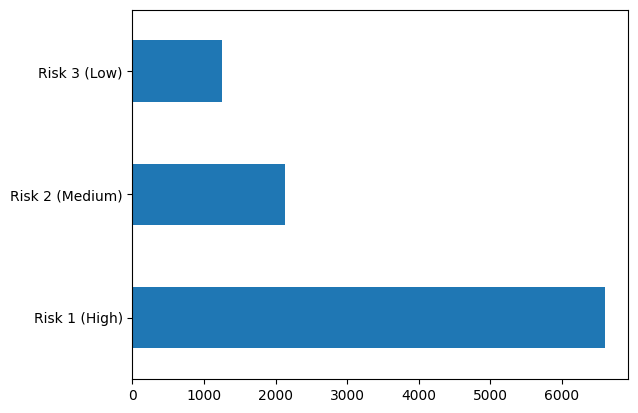

In [11]:
food_inspection_raw["risk"].value_counts().plot(kind="barh")

What are the most common violations?

In [12]:
food_inspection_raw["violations"].value_counts().sort_values(ascending=False)

32. FOOD AND NON-FOOD CONTACT SURFACES PROPERLY DESIGNED, CONSTRUCTED AND MAINTAINED - Comments: VIOLATION STILL PENDING | 33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSILS CLEAN, FREE OF ABRASIVE DETERGENTS - Comments: VIOLATION STILL PENDING | 34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD REPAIR, COVING INSTALLED, DUST-LESS CLEANING METHODS USED - Comments: VIOLATION STILL PENDING | 35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTRUCTED PER CODE: GOOD REPAIR, SURFACES CLEAN AND DUST-LESS CLEANING METHODS - Comments: VIOLATION STILL PENDING | 36. LIGHTING: REQUIRED MINIMUM FOOT-CANDLES OF LIGHT PROVIDED, FIXTURES SHIELDED - Comments: VIOLATION STILL PENDING | 38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS REQUIRED: PLUMBING: INSTALLED AND MAINTAINED - Comments: VIOLATION STILL PENDING | 40. REFRIGERATION AND METAL STEM THERMOMETERS PROVIDED AND CONSPICUOUS - Comments: VIOLATION STILL PENDING                                                                                                 

What are the most common outcomes?

<Axes: >

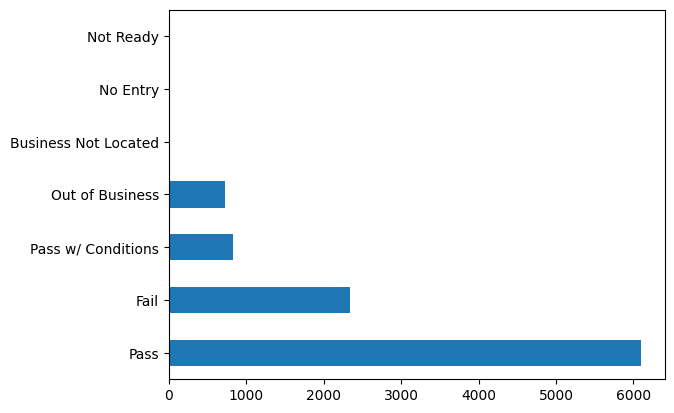

In [13]:
food_inspection_raw["results"].value_counts().plot(kind="barh")

What are the most common facility types?

In [14]:
food_inspection_raw["facility_type"].value_counts().sort_values(ascending=False).head(25)

Restaurant                         6090
Grocery Store                      1492
School                              564
Daycare (2 - 6 Years)               261
Bakery                              134
Children's Services Facility        132
Daycare Above and Under 2 Years     130
Liquor                               83
Catering                             67
Wholesale                            63
Daycare Combo 1586                   55
Long Term Care                       40
Mobile Food Dispenser                38
Golden Diner                         31
Daycare (Under 2 Years)              28
TAVERN                               26
Hospital                             24
convenience store                    12
BANQUET HALL                         12
GAS STATION                          10
DAYCARE                              10
Shelter                              10
KIOSK                                 7
BANQUET                               6
coffee shop                           6


### Activity 3 - Tidy Data

#### 🔄 Task

Now that you have a basic understanding of the data, the next step is to tidy the data. Create a new notebook that:

- Reads in the raw data from the postgres database.
- Tidy's the dataset.

Tips:

- Remove unnecessary rows.
- Remove unnecessary columns.

#### ✅ Solution

See notebook [example/02-etl-data-validation/notebook.ipynb](../example/02-etl-data-validation/notebook.ipynb) for examples.

### Activity 4 - Validate Data (Quick Start)

#### 🔄 Task

In the previous activity we tidied the dataset. For some projects, this may be enough. However, for this project we plan to refresh the data on a regular basis. We would like to gain additional comfort that the data we are using is correct. Data validation can help prove that our data tidying was correct, and find any potential issues if the upstream data changes.

[Pandera](https://pandera.readthedocs.io/en/stable/) is a Python library for validating Pandas dataframes. There are two steps:

1. Define a schema for your data:
   - Define the type for each column
   - Confirm if null values are allowed
   - Define custom checks
2. Run your data through the schema validator.

Take 5 minutes, and work through quick start section of the Pandera Docs: https://pandera.readthedocs.io/en/stable/index.html#quick-start.

#### ✅ Solution

In [15]:
import pandas as pd
import pandera as pa

# data to validate
df = pd.DataFrame({
    "column1": [1, 4, 0, 10, 9],
    "column2": [-1.3, -1.4, -2.9, -10.1, -20.4],
    "column3": ["value_1", "value_2", "value_3", "value_2", "value_1"],
})

# define schema
schema = pa.DataFrameSchema({
    "column1": pa.Column(int, checks=pa.Check.le(10)),
    "column2": pa.Column(float, checks=pa.Check.lt(-1.2)),
    "column3": pa.Column(str, checks=[
        pa.Check.str_startswith("value_"),
        # define custom checks as functions that take a series as input and
        # outputs a boolean or boolean Series
        pa.Check(lambda s: s.str.split("_", expand=True).shape[1] == 2)
    ]),
})

validated_df = schema(df)
print(validated_df)

   column1  column2  column3
0        1     -1.3  value_1
1        4     -1.4  value_2
2        0     -2.9  value_3
3       10    -10.1  value_2
4        9    -20.4  value_1


### Activity 5 - Validate Data (Real Data)

#### 🔄 Task

Now that you understand how Pandera works, lets validate our tidy data! In your notebook where you tidy the data, create Schema to validate both data sets.

Tips:

- Most of the columns have null values.
- Use the `coerce` keyword option to automatically convert columns to the correct type.
- For categorical data, confirm that only the expected categories exist.
- Think about custom checks that you can add to validate the data.

Once your data is validated, write the validated data back to the SQL database.

🚨 Please prefix any tables you create with your name! For example:

- `sam_business_license_validated`
- `sam_food_inspections_validated`

#### ✅ Solution

See notebook [example/02-etl-data-validation/notebook.ipynb](../example/02-etl-data-validation/notebook.ipynb) for examples.

### Activity 6 - Publish the notebook to Connect

#### 🔄 Task

Publish your Jupyter Notebook to Connect and schedule it to re-run every Sunday at 3:00 AM. This time, make you are using a `requirements.txt` and a virtual environment.

#### ✅ Solution

```bash
cd your-work/activity-2
rsconnect deploy notebook --title "02 - YOUR NAME - Data Validation" notebook.ipynb
```